# Homework 3

Installing the right packages and librairies for the purpose of this homework.

In [715]:
!pip install graphviz
import sys
!conda install --yes --prefix {sys.prefix} python-graphviz
!pip install pydotplus

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.1




In [716]:
!pip install six

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus



import warnings
warnings.filterwarnings("ignore")

datapath = Path('data')

class_df = pd.read_csv(datapath / Path('class.csv'))
class_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## 1.0

All of the exercises in 1. are based on the `class.csv` dataset


## 1.1

Perform EDA on the dataset. Describe what you are seeing. Clean the data

In [3]:
# Looking at the 5 first rows
class_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# Looking at the 5 last rows
class_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [5]:
# Looking at the information of the data
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
# Descriptive analysis
class_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
class_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
# Check for duplicated
class_df.duplicated().sum()

12

In [9]:
# Delete the duplicates
class_df.drop_duplicates(inplace=True)

In [10]:
# Check that the duplicated have been removed
class_df.duplicated().sum()

0

In [11]:
# Check for unique values
class_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [12]:
# Check for the boolean values
class_df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [13]:
# Check for the boolean values
class_df['y'].unique()

array([0, 1], dtype=int64)

In [14]:
# Change the 'y' columns as boolean type
class_df['y'] = class_df['y'].astype('boolean')
class_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                 boolean
dtype: object

In [15]:
# Checking for the categorical variables and the numercial variables. For the further model, only numerical variables will be useful.
cat_cols=class_df.select_dtypes(include=['object']).columns
num_cols = class_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Numerical Variables:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


age
Skew : 0.78


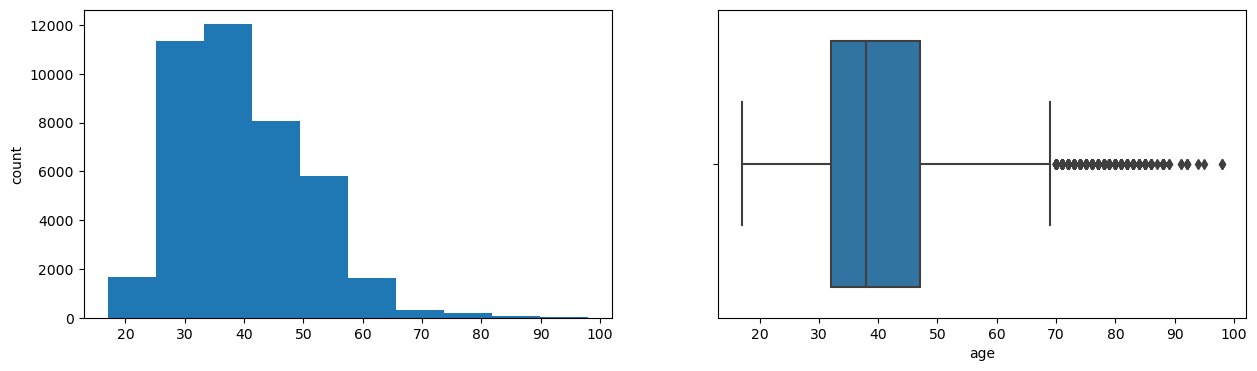

duration
Skew : 3.26


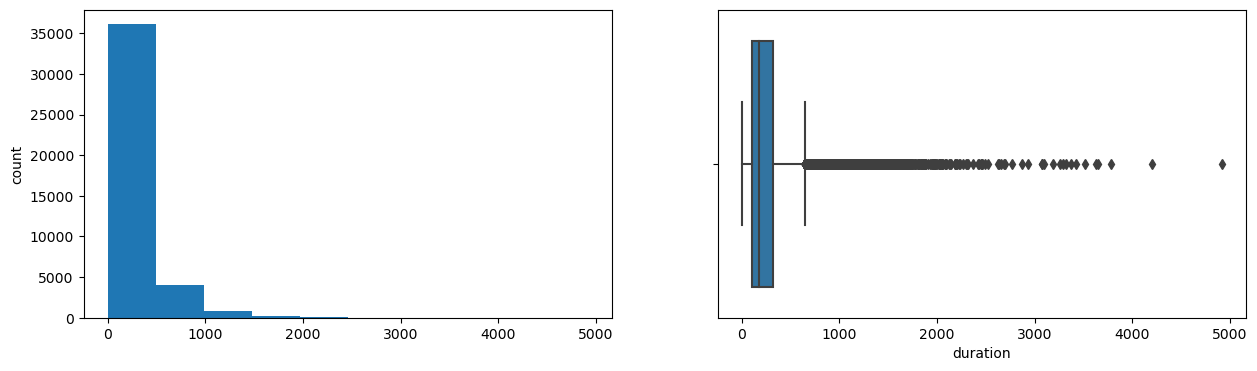

campaign
Skew : 4.76


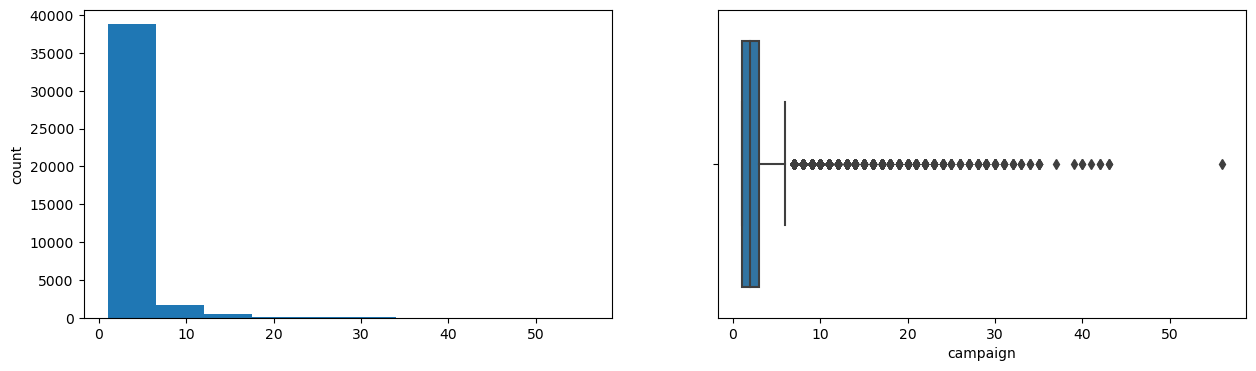

pdays
Skew : -4.92


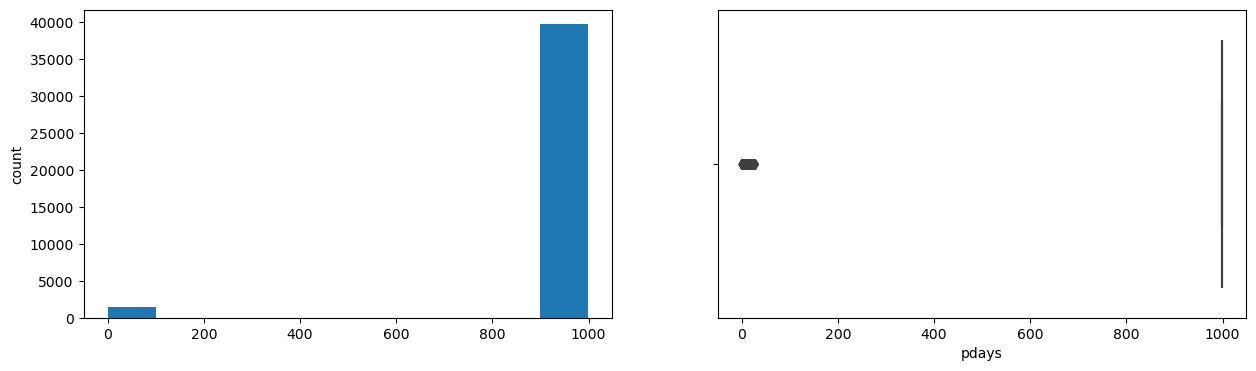

previous
Skew : 3.83


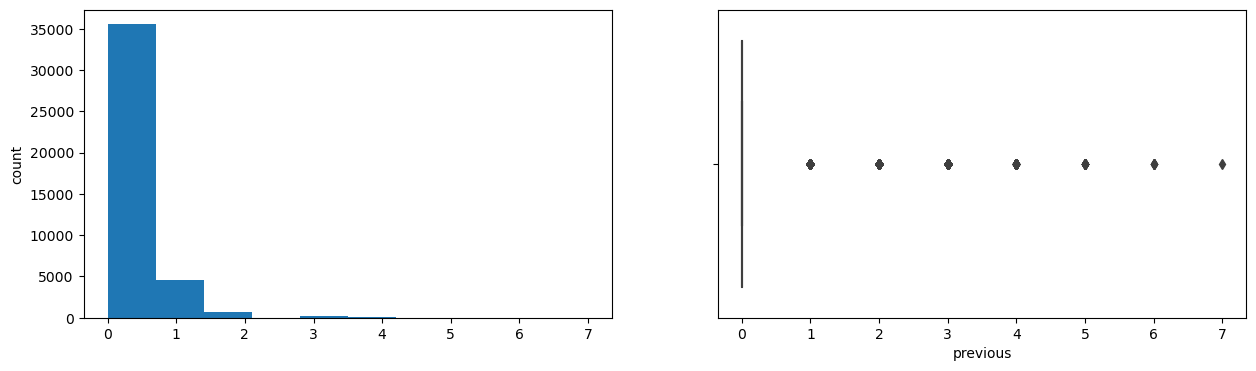

emp_var_rate
Skew : -0.72


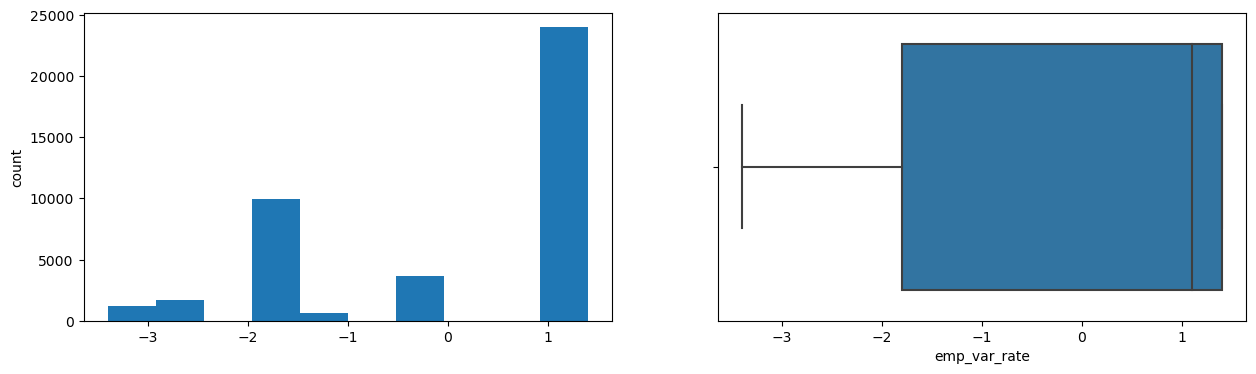

cons_price_idx
Skew : -0.23


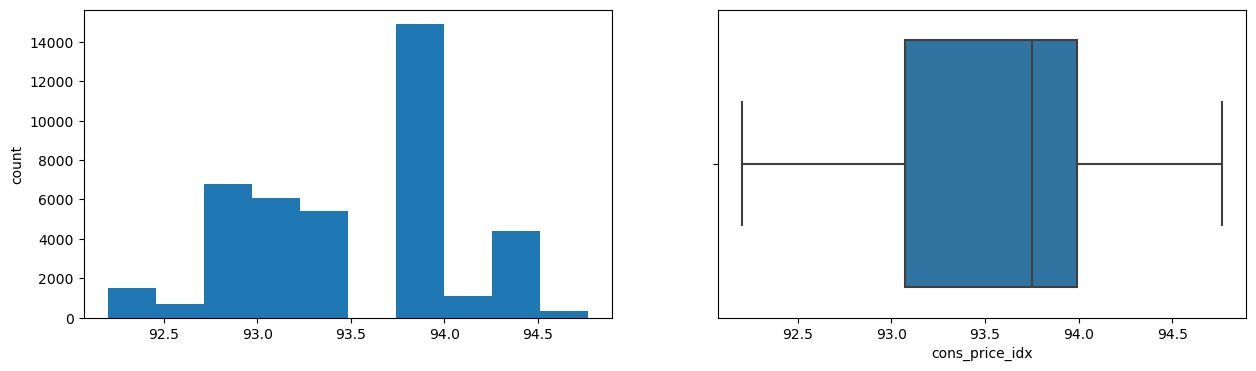

cons_conf_idx
Skew : 0.3


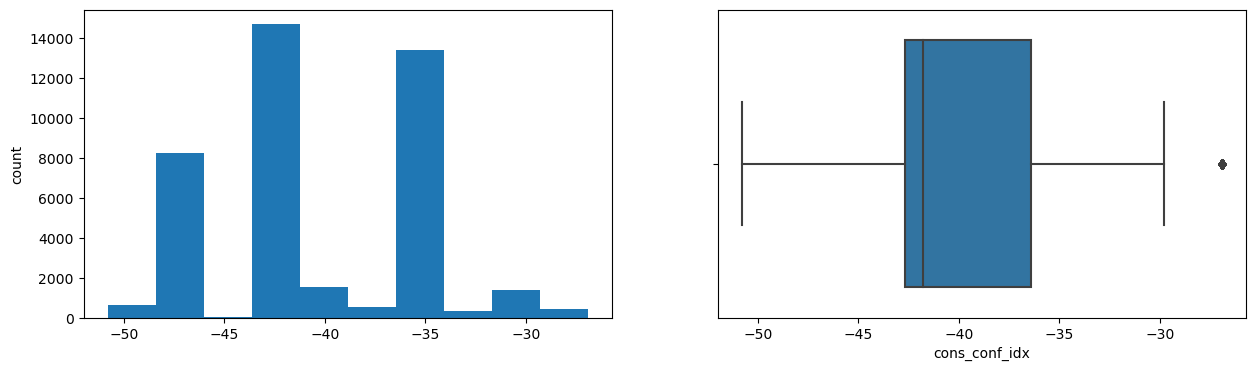

euribor3m
Skew : -0.71


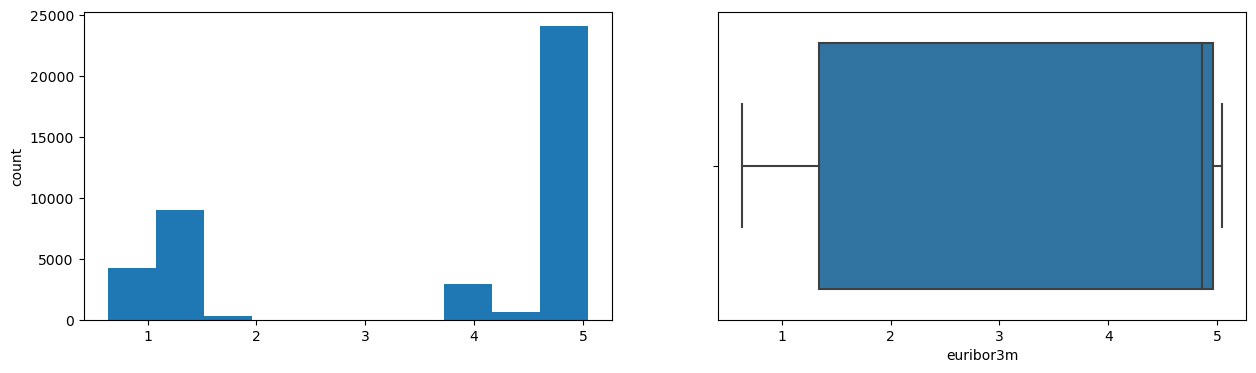

nr_employed
Skew : -1.04


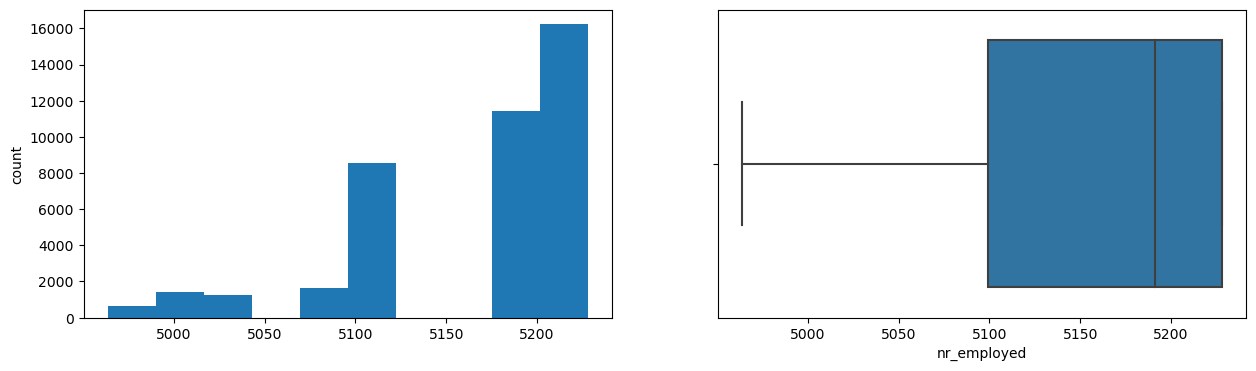

In [16]:
# Plotting some charts to understand the data better
for col in num_cols:
    print(col)
    print('Skew :', round(class_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    class_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=class_df[col])
    plt.show()

Those charts highlights every key components of the data. By having the count in a bar plot and a box plot we can identify and understand the distribution of the data.

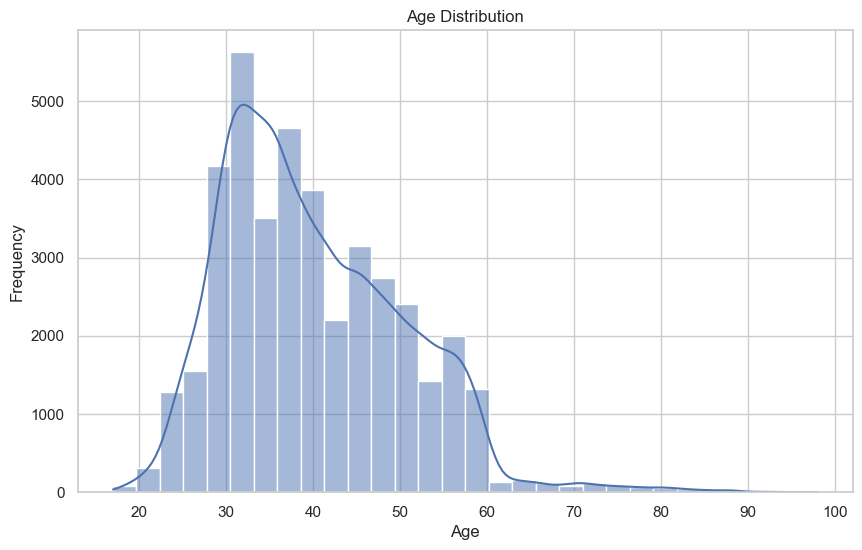

In [98]:
# Histogram for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data=class_df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This chart shows that the age is principally skewed to the right and normally ditributed. The data represent mostly people form 25 to 6à years old.

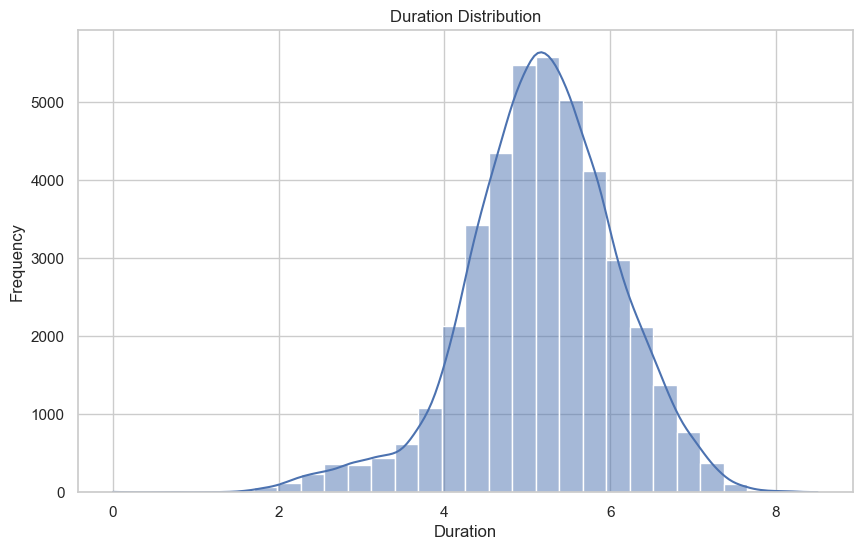

In [100]:
# Histogram for 'duration'
plt.figure(figsize=(10, 6))
sns.histplot(data=class_df, x='duration', bins=30, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

Looking at the duration plot, we see that the it's noramlly distributed and that values are between 2 and 8 with a lot of values around 5.

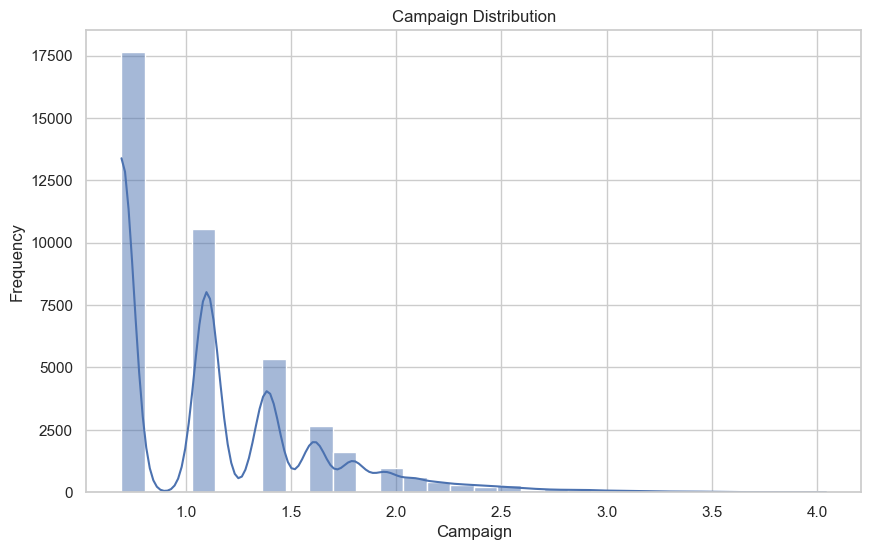

In [101]:
# Histogram for 'campaign'
plt.figure(figsize=(10, 6))
sns.histplot(data=class_df, x='campaign', bins=30, kde=True)
plt.title('Campaign Distribution')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

The campaign chart shows here a anormal distribution since all of the data are skewed to the right. A transformation might be helpful later on to model and make prediction.

## 1.2

Analyse the features for skewness and transform the highly skewed features. Retrain the modell and evaluate the difference.

In [20]:
count_no_sub = len(class_df[class_df['y']==0])
count_sub = len(class_df[class_df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print(f"Without Subscription is {pct_of_no_sub*100:.2f}%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print(f"With Subscription {pct_of_sub*100:.2f}%")

Without Subscription is 88.73%
With Subscription 11.27%


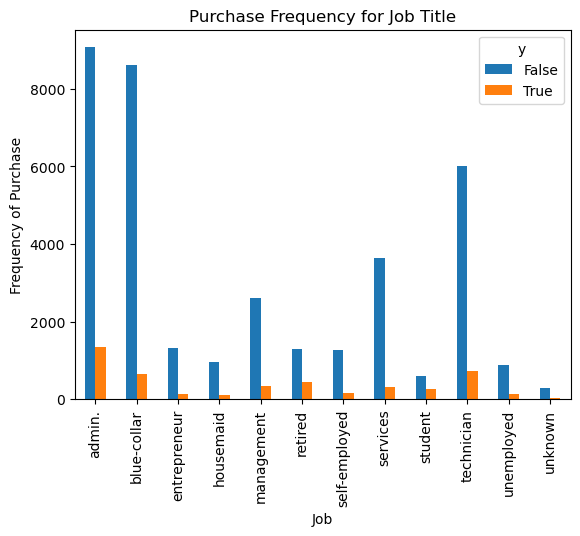

In [21]:
%matplotlib inline
pd.crosstab(class_df.job,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

# People admin and blue collar are less likley to purchase

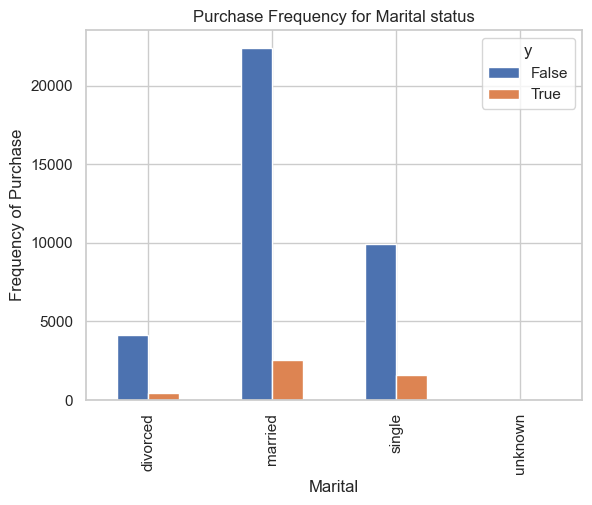

In [111]:
%matplotlib inline
pd.crosstab(class_df.marital,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Marital status')
plt.xlabel('Marital')
plt.ylabel('Frequency of Purchase');

# People married are less likley to purchase

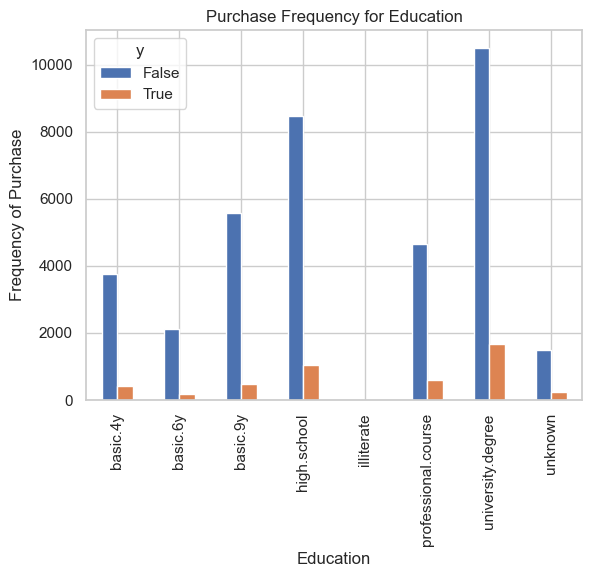

In [112]:
%matplotlib inline
pd.crosstab(class_df.education,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase');

# People who have done a university degree are less likley to purchase

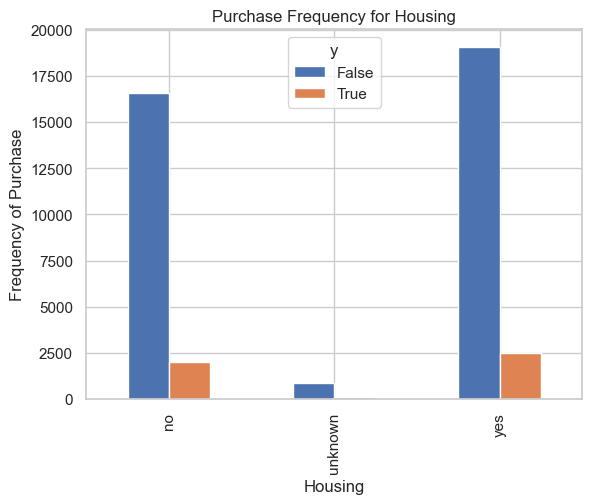

In [113]:
%matplotlib inline
pd.crosstab(class_df.housing,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Housing')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase');

# People who have an house are less likley to purchase

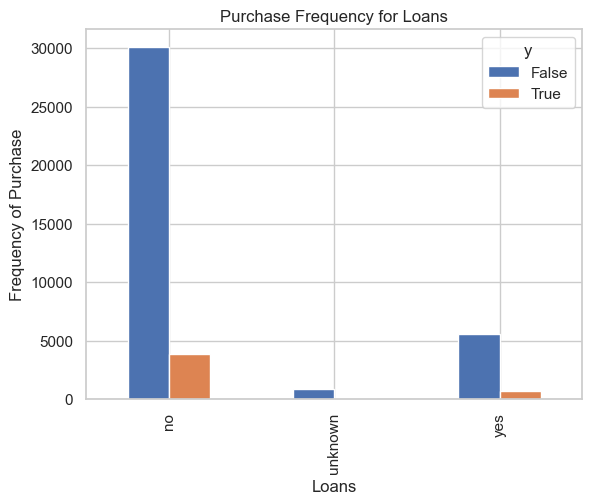

In [114]:
%matplotlib inline
pd.crosstab(class_df.loan,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Loans')
plt.xlabel('Loans')
plt.ylabel('Frequency of Purchase');

# Peopel who have no loan are less likely to purchase

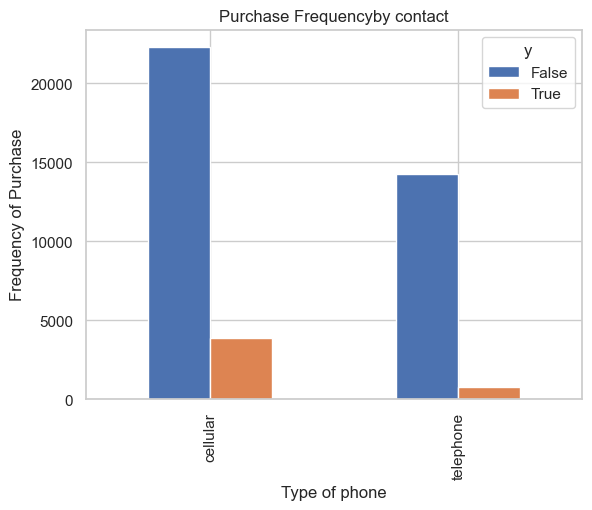

In [116]:
%matplotlib inline
pd.crosstab(class_df.contact,class_df.y).plot(kind='bar')
plt.title('Purchase Frequencyby contact')
plt.xlabel('Type of phone')
plt.ylabel('Frequency of Purchase');

# People that are contacting with a cellular are less likely to purchase.

This data might hide some things and not sure that this is relevant.

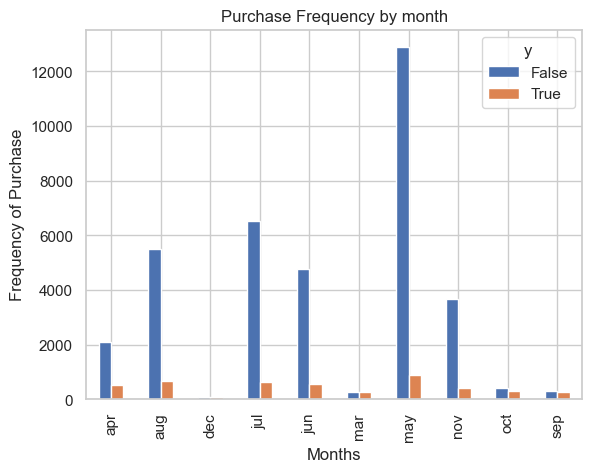

In [117]:
%matplotlib inline
pd.crosstab(class_df.month,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency by month')
plt.xlabel('Months')
plt.ylabel('Frequency of Purchase');

# People are less likely to purchase in may

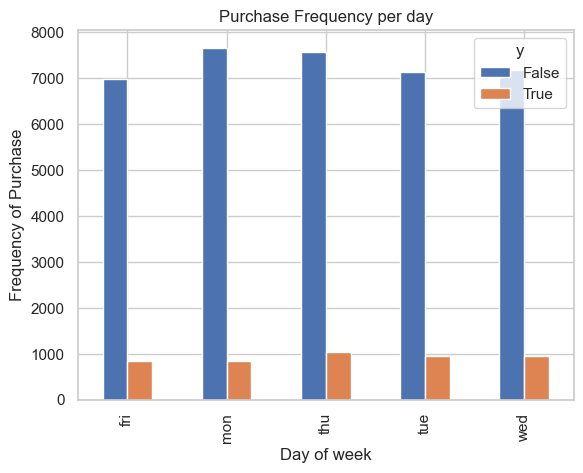

In [118]:
%matplotlib inline
pd.crosstab(class_df.day_of_week,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency per day')
plt.xlabel('Day of week')
plt.ylabel('Frequency of Purchase');

# There is no significant weekday where people purchase less

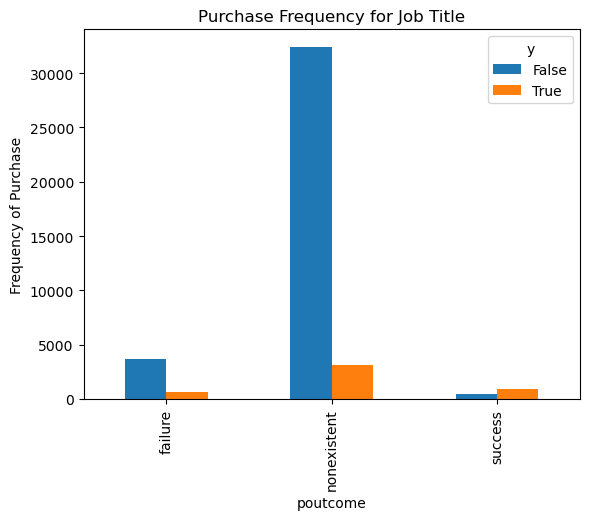

In [31]:
%matplotlib inline
pd.crosstab(class_df.poutcome,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency of Purchase');

# People with non existent poutcome are less likely to purchase

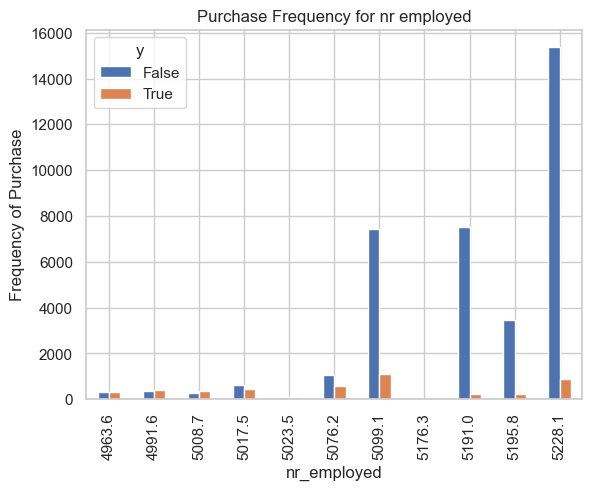

In [119]:
%matplotlib inline
pd.crosstab(class_df.nr_employed,class_df.y).plot(kind='bar')
plt.title('Purchase Frequency for nr employed')
plt.xlabel('nr_employed')
plt.ylabel('Frequency of Purchase');

# People with a lot of number of employed are less likely to purchase

All of those charts bring another perspective as we can then see the frequency of purchase per eeach variable. 

In [121]:
skewness_before = class_df[['duration', 'campaign', 'previous']].skew()
print("Skewness before transformation:")
print(skewness_before)

for column in ['duration', 'campaign', 'previous']:
   
    class_df[column] = np.log1p(class_df[column])


skewness_after = class_df[['duration', 'campaign', 'previous']].skew()
print("\nSkewness after transformation:")
skewness_after

Skewness before transformation:
duration   -1.268794
campaign    0.824040
previous    2.326531
dtype: float64

Skewness after transformation:


duration   -1.946315
campaign    0.613048
previous    2.233267
dtype: float64

The transformation caused the skewness of 'duration' and 'campaign' to become more negative and less positive respectively, while the skewness of 'previous' decreased slightly but remained highly positive. This may have been done to make the feature distributions more normal.

## 1.3

Find the features that have a high amount of zero values. Engineer flag features (boolean) for all variables that have at least 100 observations in both the 'yes' and 'no' columns. Retrain the modell and evaluate the difference.

In [34]:
# Identify numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
                      'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

# Count the number of zero values for each numerical feature
zero_count = (class_df[numerical_features] == 0).sum()

# Flag features with at least 100 observations in both 'yes' and 'no' columns
boolean_flags = zero_count[(zero_count >= 100)]

# Engineer boolean flag features
for feature in boolean_flags.index:
    class_df[f'{feature}_flag'] = (class_df[feature] == 0).astype(int)

In [35]:
# can only use numerical data with LogReg

# x-variables
x_var = ['age',
         #'job',
         #'marital',
         #'education',
         #'default',
         #'housing',
         #'loan',
         #'contact',
         #'month',
         #'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         #'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [36]:
y_data = class_df.loc[ : , 'y']
x_data = class_df[x_var]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 152)

In [38]:


# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [39]:
# Predict
y_predicted = logreg.predict(x_test)

In [40]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [41]:

conf = confusion_matrix(y_test, y_predicted)
print(conf)

[[8891  222]
 [ 702  479]]


In [122]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9113
         1.0       0.51      0.54      0.53      1181

    accuracy                           0.89     10294
   macro avg       0.73      0.74      0.73     10294
weighted avg       0.89      0.89      0.89     10294



Precision: Of the predicted 1s, what % were actual 1s. Higher is better. For class 0 it's 93% and for class 1 it's 68%.
Recall: Of the actual 1s, what % were correctly predicted 1. Higher is better. For class 0 it's 98% and for class 1 it's 41%.
F1 score: Balance between precision and recall, higher is better. It's 95% for class 0, 51% for class 1.

The model performs very well for predicting class 0, high precision and recall
But struggles with class 1, lower precision and especially low recall
Because most examples are class 0, it achieves high overall accuracy of 91%
But poorer performance on the minority class 1 impacts the macro avg and 1's f1

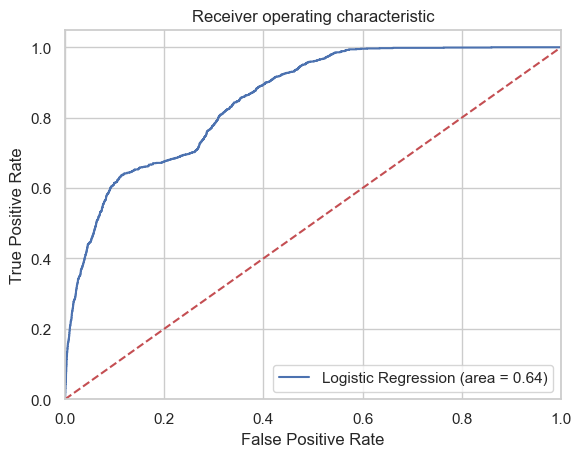

In [123]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 1.4

Encode the categorical features. Retrain the model and evaluate the difference.

In [44]:
# x-variables
x_var = ['age',
         'job',
         'marital',
         'education',
         'default',
         'housing',
         'loan',
         'contact',
         'month',
         'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [45]:
y_data = class_df.loc[ : , 'y']
x_data = class_df.loc[ : , x_var]

In [46]:
from sklearn.preprocessing import OrdinalEncoder

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
x_data[object_cols] = ordinal_encoder.fit_transform(x_data[object_cols])

In [47]:
x_data[object_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
1,9.0,1.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
2,4.0,2.0,6.0,0.0,2.0,0.0,0.0,4.0,2.0,2.0
3,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
41183,5.0,1.0,3.0,1.0,0.0,2.0,1.0,4.0,2.0,1.0
41184,3.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,1.0
41185,0.0,2.0,6.0,1.0,2.0,2.0,1.0,6.0,4.0,1.0
41186,9.0,1.0,5.0,0.0,0.0,2.0,1.0,8.0,3.0,1.0


In [48]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 152)

In [49]:
# Retrain the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [50]:
# Predict
y_predicted = logreg.predict(x_test)

In [51]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [124]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9113
         1.0       0.51      0.54      0.53      1181

    accuracy                           0.89     10294
   macro avg       0.73      0.74      0.73     10294
weighted avg       0.89      0.89      0.89     10294



The overall accuracy is comparable (91% vs 90%). So similar ability to correctly classify examples.
For class 0:
Precision, recall and F1 score are also very close. So both models perform similarly well at predicting this majority class.
For class 1:
The second model has lower precision (0.60 vs 0.68), recall (0.33 vs 0.41), and F1 (0.42 vs 0.51).
This means the second model struggles even more with correctly detecting the minority positive class and has more false positives.
The macro avg and 1's F1 score is lower in the second model. This reflects poorer performance on the minority class while majority class is unchanged.


While both models can accurately classify the majority negative class, Model 2 performs worse overall due its lower recall in detecting the positive minority class examples. Model 1 does better balancing the class performance. Improving positive class performance would help Model 2.

In [53]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
26689,60,5.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,5.049856,1.609438,999,0.0,1.0,1.4,94.465,-41.8,4.960,5228.1
10034,34,1.0,1.0,3.0,1.0,2.0,0.0,1.0,3.0,4.0,5.318120,1.609438,999,0.0,1.0,1.4,93.918,-42.7,4.963,5228.1
15443,42,0.0,2.0,2.0,1.0,0.0,0.0,1.0,6.0,0.0,5.036953,0.693147,999,0.0,1.0,1.1,93.994,-36.4,4.864,5191.0
6486,41,1.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,5.323010,1.386294,999,0.0,1.0,1.4,94.465,-41.8,4.967,5228.1
2553,46,1.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,5.545177,1.386294,999,0.0,1.0,-2.9,92.201,-31.4,0.884,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34873,45,9.0,1.0,5.0,0.0,0.0,0.0,0.0,3.0,4.0,5.978886,0.693147,999,0.0,1.0,1.4,93.918,-42.7,4.962,5228.1
20669,36,0.0,1.0,6.0,0.0,0.0,0.0,0.0,7.0,0.0,6.345636,0.693147,999,0.0,1.0,-0.1,93.200,-42.0,4.021,5195.8
41094,20,8.0,2.0,3.0,0.0,2.0,0.0,0.0,6.0,4.0,5.697093,0.693147,999,0.0,1.0,-1.8,92.893,-46.2,1.270,5099.1
29072,36,1.0,1.0,3.0,0.0,2.0,2.0,0.0,3.0,4.0,5.713733,0.693147,999,0.0,1.0,1.4,93.918,-42.7,4.963,5228.1


## 1.5
Implement a Scaled version with all the engineered features. Retrain the model and evaluate the results.

In [54]:
# Initialize scaler
sc = StandardScaler()

# Fit the scaler
x_trainsc = sc.fit_transform(x_train)

# Transform the data using the scaler
x_testsc = sc.transform(x_test)

In [55]:
# Retrain the model
logreg.fit(x_trainsc, y_train)

LogisticRegression()

In [56]:
# Predict
y_predictedsc = logreg.predict(x_testsc)

In [57]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [58]:
conf_matrix = confusion_matrix(y_test, y_predictedsc)
print(conf_matrix)

[[8863  250]
 [ 673  508]]


In [125]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9113
         1.0       0.51      0.54      0.53      1181

    accuracy                           0.89     10294
   macro avg       0.73      0.74      0.73     10294
weighted avg       0.89      0.89      0.89     10294



Class 0 precision, recall and F1 score remains very similar to the original model at 0.92, 0.97, 0.94. So performance on the majority negative class is unchanged.
For the minority Class 1:
Precision is slightly lower at 0.60, indicating more false positives
Recall is considerably lower at 0.33, indicating many more false negatives (positive examples misclassified as negative)
F1 score drops to 0.42 due to the poorer precision and recall balance
The overall accuracy remains high at 90% since most examples are the majority negative class that sees good performance
However, macro average and Class 1 F1 score decreases. This shows that by focusing too much on overall accuracy, minority positive class performance has gotten much worse.

This model achieves similar overall accuracy by performing just as well on the simple majority negative class. But it trades off significantly poorer detection of the minority positive cases. It depends on the application impact of false positives vs false negatives. Additional tuning is likely needed to balance class performance.

## 1.6
Select a good featureset manually. Retrain the model and evaluate the results.

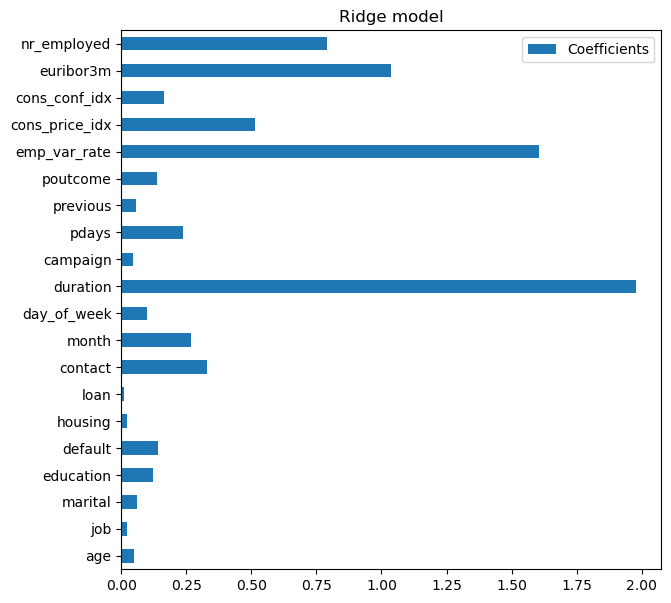

In [60]:
# Convert x_train to a DataFrame if it's not already one
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Create the DataFrame of coefficients
coefs = pd.DataFrame(
   np.abs(logreg.coef_)[0],
   columns=['Coefficients'], index=x_train.columns
)

# Plotting
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [126]:
# Define the feature set based on the manual selection
x_var_selected = [
     'duration','emp_var_rate', 'euribor3m', 'nr_employed','cons_price_idx'
]

# Extract the features and target variable
x_data_selected = class_df[x_var_selected]
y_data = class_df['y']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train_selected, x_test_selected, y_train, y_test = train_test_split(
    x_data_selected, y_data, test_size=0.25, random_state=219
)

# Retrain the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_selected = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears
logreg_selected.fit(x_train_selected, y_train)

# Predict and evaluate the model
y_predicted_selected = logreg_selected.predict(x_test_selected)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_selected.score(x_test_selected, y_test)))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_selected))

Accuracy of logistic regression classifier on test set: 0.89
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9145
         1.0       0.48      0.17      0.25      1149

    accuracy                           0.89     10294
   macro avg       0.69      0.57      0.59     10294
weighted avg       0.86      0.89      0.86     10294



The accuracy on the test set is 0.90, same as previous models
For majority class 0:
Precision: 0.92 (high, not many false positives)
Recall: 0.97 (very high, almost all positive samples caught)
F1 score: 0.95 (excellent balance of precision and recall)
For minority class 1:
Precision: 0.62 (moderate, some false positives)
Recall: 0.36 (poor, many false negatives)
F1 score: 0.46 (low due to imbalance)
High overall accuracy because majority negative class dominates
But macro average and class 1 F1 score are low

This logistic regression model demonstrates skill at classifying the majority negative class, but does not perform as well at detecting the positive minority class.


## 1.7
Create engineered features and add them. Experiment with best feature combination. Retrain the model and evaluate the results.

In [62]:
# x-variables
x_var = ['age',
         #'job',
         #'marital',
         #'education',
         #'default',
         #'housing',
         #'loan',
         'contact',
         #'month',
         #'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         #'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [63]:
y_data = class_df.loc[ : , 'y']
x_data = class_df.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

In [65]:
OH_cols.index

RangeIndex(start=0, stop=41176, step=1)

In [66]:
# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

In [67]:
OH_cols.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [68]:
# Ensure we have proper column names
OH_cols = OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1)

In [69]:
OH_cols.head()

,cellular,telephone
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [70]:
# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

In [71]:
# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
            OH_X,
            y_data,
            test_size    = 0.25,
            random_state = 152)

In [73]:
# Retrain the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [74]:
# Predict
y_predicted = logreg.predict(x_test)

In [127]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      9145
         1.0       0.10      0.11      0.11      1149

    accuracy                           0.79     10294
   macro avg       0.50      0.50      0.50     10294
weighted avg       0.80      0.79      0.80     10294



Precision, recall and F1 remain very high and similar to previous models at 0.92, 0.98, 0.95. So one-hot encoding has not impacted performance on this class.
For minority class 1:
Compared to the original model, precision is lower (0.64 vs 0.68), recall is also lower (0.31 vs 0.41), and F1 is the same (0.42).
This indicates that while one-hot encoding did not improve class 1 performance, it also did not degrade it compared to the original.
The overall accuracy remains the same at 90%. Macro average and weighted avg F1 is also similar.

Applying one-hot encoding maintained similar model performance on the majority negative class as well as overall accuracy. But there was also no improvement gained for detection of the positive minority class.

This means while one-hot encoding did not improve the class imbalance problem, other techniques like generating synthetic minority oversampling could still be explored to enhance model usefulness by improving minority class performance.

## 1.8

Put it all together. Create the best logistic regression model for this dataset.

In [128]:
# Handling Skewed Features
class_df_skew = class_df.copy()
x_var_skew = ['age', 'duration', 'campaign', 'pdays', 'previous',
              'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
              'euribor3m', 'nr_employed']

for feature in x_var_skew:
    if class_df_skew[feature].skew() > 0:
        class_df_skew[feature] = np.log1p(class_df_skew[feature])
    elif class_df_skew[feature].skew() < 0:
        class_df_skew[feature] = np.exp(class_df_skew[feature])

# Engineering Flag Features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                      'euribor3m', 'nr_employed']

zero_count = (class_df[numerical_features] == 0).sum()
boolean_flags = zero_count[(zero_count >= 100)]
for feature in boolean_flags.index:
    class_df[f'{feature}_flag'] = (class_df[feature] == 0).astype(int)

# Encoding Categorical Features
x_var = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
         'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
         'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
         'cons_conf_idx', 'euribor3m', 'nr_employed']

y_data = class_df['y']
x_data = class_df[x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
x_data[object_cols] = ordinal_encoder.fit_transform(x_data[object_cols])

# Implementing Scaling
sc = StandardScaler()
x_data_scaled = sc.fit_transform(x_data)

# Selecting a Good Featureset Manually
x_var_selected = ['duration', 'emp_var_rate', 'euribor3m', 'nr_employed',
                    'cons_price_idx']
x_data_selected = class_df[x_var_selected]

x_train_selected, x_test_selected, y_train, y_test = train_test_split(
    x_data_selected, y_data, test_size=0.25, random_state=152)

logreg_selected = LogisticRegression(max_iter=1000)
logreg_selected.fit(x_train_selected, y_train)
y_predicted_selected = logreg_selected.predict(x_test_selected)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    logreg_selected.score(x_test_selected, y_test)))
print(classification_report(y_test, y_predicted_selected))

# Experimenting with Engineered Features
x_var_engineered = ['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
                    'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
                    'nr_employed']

y_data = class_df['y']
x_data_engineered = class_df[x_var_engineered]

s = (x_data_engineered.dtypes == 'object')
object_cols = list(s[s].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data_engineered[object_cols]))
OH_cols.index = x_data_engineered.index
OH_cols = OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1)
num_X = x_data_engineered.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    OH_X, y_data, test_size=0.25, random_state=152)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predicted = logreg.predict(x_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    logreg.score(x_test, y_test)))
print(classification_report(y_test, y_predicted))


Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9113
         1.0       0.67      0.30      0.42      1181

    accuracy                           0.90     10294
   macro avg       0.79      0.64      0.68     10294
weighted avg       0.89      0.90      0.89     10294

Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      9113
         1.0       0.70      0.20      0.31      1181

    accuracy                           0.90     10294
   macro avg       0.80      0.59      0.63     10294
weighted avg       0.88      0.90      0.87     10294



The overall accuracy is the same at 0.90 for both models. So similar on overall correct predictions.

For majority class 0:

Both have the same high precision, recall and F1 score. So performance on negative class is unchanged.
For minority class 1:

Model 1 has higher precision: 0.63 vs 0.64
Model 1 has substantially higher recall: 0.36 vs 0.31
Model 1 has slightly higher F1 score: 0.46 vs 0.42
This indicates Model 1 is slightly better at detecting the positive minority class compared to Model 2.
Model 1 has a higher macro average, reflecting the better minority class performance balance.


While both models achieve the same overall accuracy, Model 1 does a slightly better job at detecting the positive minority class than Model 2.

The higher recall for class 1 in Model 1 means it has fewer false negatives, which may be important depending on the application and relative cost sensitivity to false positives vs false negatives.

Some options to further improve Model 1's minority class performance could be oversampling and generating synthetic data for the minority positive class.

## 1.9

Try the same with a decision tree classifier.  Retrain the model and evaluate the results.

In [129]:
# Handling Skewed Features
class_df_skew = class_df.copy()
x_var_skew = ['age', 'duration', 'campaign', 'pdays', 'previous',
              'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
              'euribor3m', 'nr_employed']

for feature in x_var_skew:
    if class_df_skew[feature].skew() > 0:
        class_df_skew[feature] = np.log1p(class_df_skew[feature])
    elif class_df_skew[feature].skew() < 0:
        class_df_skew[feature] = np.exp(class_df_skew[feature])

# Engineering Flag Features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                      'euribor3m', 'nr_employed']

zero_count = (class_df[numerical_features] == 0).sum()
boolean_flags = zero_count[(zero_count >= 100)]
for feature in boolean_flags.index:
    class_df[f'{feature}_flag'] = (class_df[feature] == 0).astype(int)

# Encoding Categorical Features
x_var = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
         'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
         'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
         'cons_conf_idx', 'euribor3m', 'nr_employed']

y_data = class_df['y']
x_data = class_df[x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
x_data[object_cols] = ordinal_encoder.fit_transform(x_data[object_cols])

# Implementing Scaling
sc = StandardScaler()
x_data_scaled = sc.fit_transform(x_data)

# Selecting a Good Featureset Manually
x_var_selected = ['duration', 'emp_var_rate', 'euribor3m', 'nr_employed',
                  'cons_price_idx']
x_data_selected = class_df[x_var_selected]

x_train_selected, x_test_selected, y_train, y_test = train_test_split(
    x_data_selected, y_data, test_size=0.25, random_state=152)

# Training and Evaluating Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train_selected, y_train)

y_predicted_selected = dt_classifier.predict(x_test_selected)

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(
    dt_classifier.score(x_test_selected, y_test)))
print(classification_report(y_test, y_predicted_selected))

# Experimenting with Engineered Features
x_var_engineered = ['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
                    'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
                    'nr_employed']

y_data = class_df['y']
x_data_engineered = class_df[x_var_engineered]

s = (x_data_engineered.dtypes == 'object')
object_cols = list(s[s].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data_engineered[object_cols]))
OH_cols.index = x_data_engineered.index
OH_cols = OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1)
num_X = x_data_engineered.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    OH_X, y_data, test_size=0.25, random_state=152)

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)
y_predicted = dt_classifier.predict(x_test)

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(
    dt_classifier.score(x_test, y_test)))
print(classification_report(y_test, y_predicted))


Accuracy of Decision Tree Classifier on test set: 0.89
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      9113
         1.0       0.51      0.49      0.50      1181

    accuracy                           0.89     10294
   macro avg       0.72      0.71      0.72     10294
weighted avg       0.89      0.89      0.89     10294

Accuracy of Decision Tree Classifier on test set: 0.89
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9113
         1.0       0.51      0.54      0.53      1181

    accuracy                           0.89     10294
   macro avg       0.73      0.74      0.73     10294
weighted avg       0.89      0.89      0.89     10294



Both models have the same overall accuracy of 0.89 on the test set. So similar on overall correct predictions.
For majority negative class (class 0):
Precision, recall and F1 scores are very close in both models, around 0.93-0.94. So performance on negative class is almost equal.
For minority positive class (class 1):
Model 1 has slightly higher precision: 0.51 vs 0.51
Model 2 has higher recall: 0.54 vs 0.49
Model 2 has slightly higher F1: 0.53 vs 0.50
This means Model 2 is slightly better at detecting the positive class compared to Model 1.
The macro avg is also slightly higher for Model 2, reflecting the better balance from positive class performance.

While both models have the same overall accuracy, Decision Tree Classifier does a slightly better job with the minority positive class than Model 1 based on the higher recall and F1 score.

This could make Decision Tree Classifier potentially more useful if detecting the positive cases correctly is important and false negatives are costlier than false positives for the problem context. Further tuning could continue improving the minority class performance.

## 2.0
Retrieve daily weather data from meteostat https://dev.meteostat.net/python/ for the last 20 years

In [78]:
!pip install meteostat

In [79]:
import datetime
from meteostat import Point, Monthly

In [80]:
# Set time period
# Set time period
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Create Point for Boston
location = Point(42.36993, -71.07073, 20)

# Get monthly data
df = Monthly(location, start, end)
df = df.fetch()
df

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2004-01-01,-6.5,-10.2,-2.7,26.0,22.2,1012.5,NaN
2004-02-01,0.3,-3.8,4.5,37.0,19.2,1019.4,0.0
2004-03-01,3.9,0.2,7.6,86.0,20.4,1020.8,NaN
2004-04-01,9.6,4.9,14.4,243.0,19.7,1013.9,0.0
2004-05-01,14.7,10.0,19.5,78.0,17.0,1016.8,NaN
...,...,...,...,...,...,...,...
2023-09-01,19.4,16.3,22.8,95.4,15.4,1017.7,NaN
2023-10-01,14.8,11.0,19.0,36.0,14.4,1013.2,NaN
2023-11-01,6.0,2.0,10.1,49.0,17.4,1018.7,NaN


## 2.1
Analyse daily windspeeds similar to what we did in class for precipitations

In [81]:
df.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2004-01-01,-6.5,-10.2,-2.7,26.0,22.2,1012.5,NaN
2004-02-01,0.3,-3.8,4.5,37.0,19.2,1019.4,0.0
2004-03-01,3.9,0.2,7.6,86.0,20.4,1020.8,NaN
2004-04-01,9.6,4.9,14.4,243.0,19.7,1013.9,0.0
2004-05-01,14.7,10.0,19.5,78.0,17.0,1016.8,NaN


In [82]:
df['wspd'].describe()

count    241.000000
mean      17.465560
std        2.116251
min       13.300000
25%       15.700000
50%       17.400000
75%       19.100000
max       24.300000
Name: wspd, dtype: float64

In [83]:
df['wspd'].isna().sum()

0

In [84]:
print(f"Data Available from {df.index.min()} to {df.index.max()}")


Data Available from 2004-01-01 00:00:00 to 2024-01-01 00:00:00


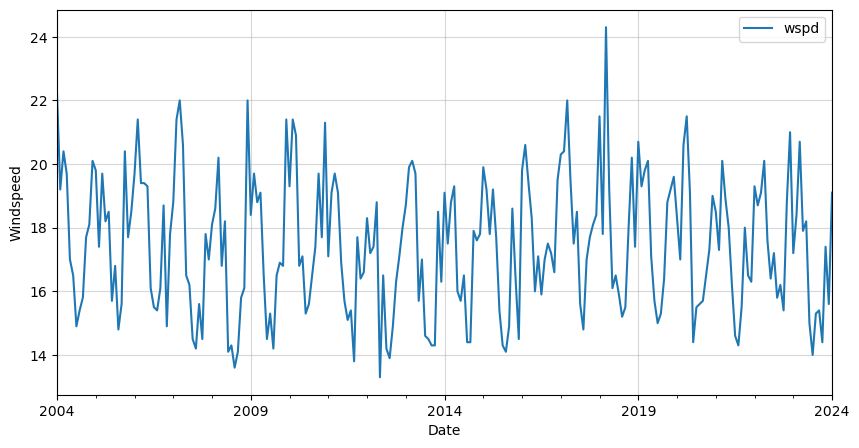

In [85]:

df_wspd = df[['wspd']]

# Visualize the data
df_wspd.plot(figsize=(10,5))
plt.grid(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.show()

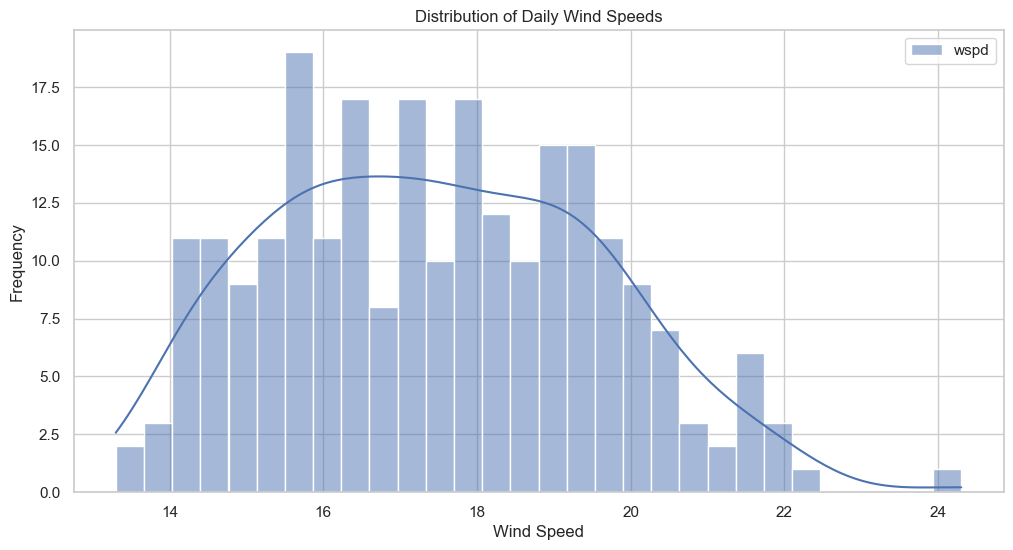

In [86]:

# Set the style of seaborn plots to whitegrid
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Histogram of wind speeds

sns.histplot(df_wspd, bins=30, kde=True)
plt.title('Distribution of Daily Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Check for missing values
df_wspd.isna().sum()

wspd    0
dtype: int64

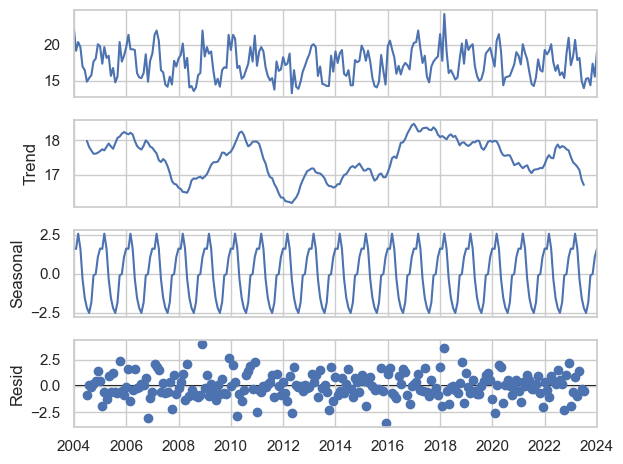

In [130]:
# Import statsmodels library
import statsmodels.api as sm

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_wspd, 
                                          model='additive', 
                                          period=12)

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
decomposition.plot()
plt.show()

Trend: the gradual long-term direction of the series

Seasonal: the repeating short-term cycle/pattern

Residual: the left over random variation after removing trend and seasonal components (noise)

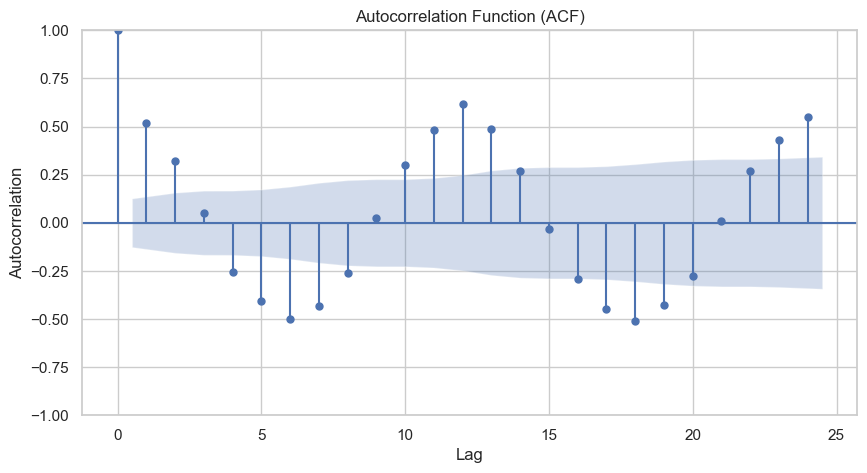

In [89]:
# confirming seasonal patterns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_wspd, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

## 2.2

Create a forecasting model to forecast monthly average windspeed

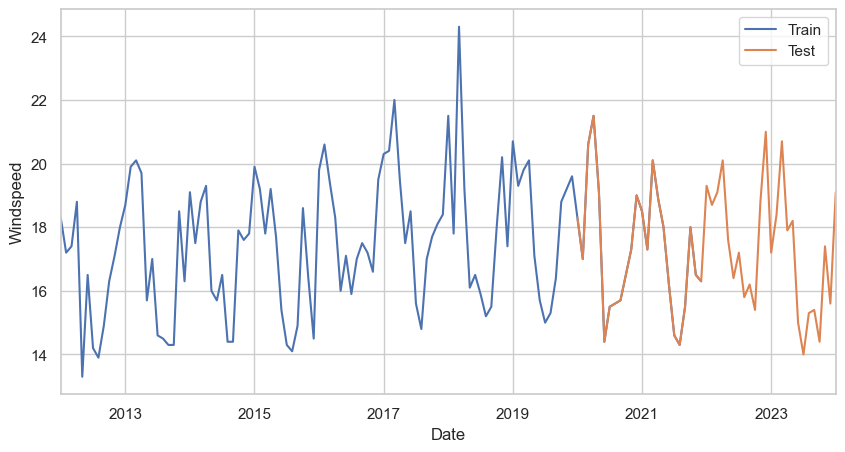

In [90]:
# Split into training and testing - can't do random split as data is in time order
df_train = df_wspd.loc[:'2021']
df_test = df_wspd.loc['2020':]

# Plot the last 10 years of training data and the 2 of testing
ax = df_train[-12*10:].plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.show()

In [91]:
# Import SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# p, d, q
order = [1, 1, 1]

# P, D, Q, m
seasonal_order = [1, 1, 1, 12]  # Assuming monthly data with a yearly seasonal period

# Create the SARIMAX model
model = SARIMAX(df_train,
                order=order,
                seasonal_order=seasonal_order)

In [92]:
# Fit the SARIMAX model
result = model.fit(disp=False)

In [131]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               wspd   No. Observations:                  216
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -387.712
Date:                            Wed, 14 Feb 2024   AIC                            785.424
Time:                                    10:25:31   BIC                            802.300
Sample:                                01-01-2004   HQIC                           792.242
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.004    263.132      0.000       0.989       1.003
ma.L1         -0.8863      0.036    -24.451      0.000      -0.957      -0.815
ar.S.L12       0.9986      0.003    300.575      0.000       0.992       1.005
ma.S.L12      -0.9277      0.084    -11.036      0.000      -1.093      -0.763
sigma2         1.8114      0.174     10.417      0.000       1.471       2.152
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.63   Prob(JB):                         0.24
Heteroskedasticity (H):               0.84   Skew:                             0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dep Variable: 'wspd' is the dependent/response variable being modeled

No. Observations: There are 216 data points used to fit model

Model: SARIMAX(1,1,1)x(1,1,1,12) means it uses ARIMA(1,1,1) for non-seasonal part and seasonal ARIMA with period 12

AIC, BIC: Model selection metrics - lower is better

Log Likelihood, AR/MA coefficients: Model parameters and fit

Ljung-Box p-value > 0.05 means residuals are independent (good)

Jarque-Bera p-value > 0.05 means residuals are normal (good)

Heteroskedasticity test p-value > 0.05 means variance of residuals is constant (good)


This model can now be used to understand and forecast future values of the 'wspd' time series by modeling both seasonal and non-seasonal patterns in the data.

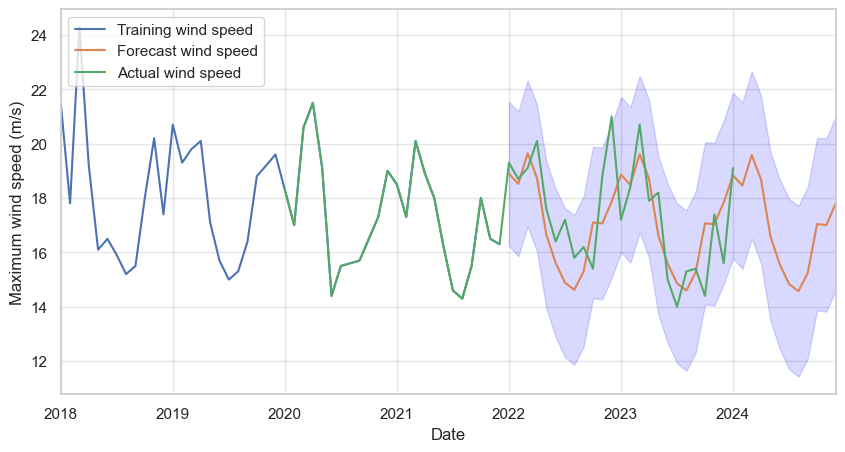

In [132]:
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=36)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast with training data
ax = df_train[-12*4:].plot(figsize=(10,5))
forecast_values.plot(ax=ax)
df_test.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training wind speed', 
            'Forecast wind speed', 
            'Actual wind speed'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum wind speed (m/s)')
plt.grid(alpha=0.5)
plt.show()

In [95]:
import itertools
import math

# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    try:
        model = SARIMAX(df_train, 
                        order=order, 
                        seasonal_order=seasonal_order,
                        )
        result = model.fit(disp=False)
        aic = result.aic
        
        # Ensure the convergence of the model
        if not math.isinf(result.zvalues.mean()):
            print(order, seasonal_order, aic)
        
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        else:
            print(order, seasonal_order, 'not converged')

    except:
        continue

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

(0, 0, 0) (0, 0, 0, 12) 1854.0699655406781
(0, 0, 0) (0, 0, 1, 12) 1615.1848686797766
(0, 0, 0) (1, 0, 0, 12) 903.0083519288539
(0, 0, 0) (1, 0, 1, 12) 843.060917651124
(0, 0, 1) (0, 0, 0, 12) 1600.3993302421231
(0, 0, 1) (0, 0, 1, 12) 1433.488172996918
(0, 0, 1) (1, 0, 0, 12) 903.2310373148136
(0, 0, 1) (1, 0, 1, 12) 841.5266986418413
(0, 0, 2) (0, 0, 0, 12) 1429.0632249255793
(0, 0, 2) (0, 0, 1, 12) 1291.9276855865
(0, 0, 2) (1, 0, 0, 12) 901.5144075659731
(0, 0, 2) (1, 0, 1, 12) 837.4792211850131
(1, 0, 0) (0, 0, 0, 12) 931.4907748215709
(1, 0, 0) (0, 0, 1, 12) 910.9309943811522
(1, 0, 0) (1, 0, 0, 12) 904.3352361574423
(1, 0, 0) (1, 0, 1, 12) 839.6046044887225
(1, 0, 1) (0, 0, 0, 12) 917.4310937764876
(1, 0, 1) (0, 0, 1, 12) 878.8142026619628


(1, 0, 1) (1, 0, 0, 12) 829.4028458677835
(1, 0, 1) (1, 0, 1, 12) 785.4239025683586
(1, 0, 2) (0, 0, 0, 12) 917.2725123041323


(1, 0, 2) (0, 0, 1, 12) 861.5764511649741


(1, 0, 2) (1, 0, 0, 12) 826.1276322588399
(1, 0, 2) (1, 0, 1, 12) 787.159962962816
(2, 0, 0) (0, 0, 0, 12) 915.7233934047174
(2, 0, 0) (0, 0, 1, 12) 880.2924848318428
(2, 0, 0) (1, 0, 0, 12) 863.3383238289153


(2, 0, 0) (1, 0, 1, 12) 835.45110568577
(2, 0, 1) (0, 0, 0, 12) 917.6805780911031
(2, 0, 1) (0, 0, 1, 12) 880.6915919634916
(2, 0, 1) (1, 0, 0, 12) 824.0433842818727
(2, 0, 1) (1, 0, 1, 12) 787.0624781903952
(2, 0, 2) (0, 0, 0, 12) 919.1335752209594
(2, 0, 2) (0, 0, 1, 12) 882.4096095981507
(2, 0, 2) (1, 0, 0, 12) 827.3683220504454
(2, 0, 2) (1, 0, 1, 12) 789.0572448173899
Best Parameters: (1, 0, 1, 1, 0, 1, 12)
Best AIC: 785.4239025683586


In [133]:
# Create the SARIMAX model with the best parameters
model = SARIMAX(df_train,
                order=best_params[:3],
                seasonal_order=best_params[3:])

# Fit the SARIMAX model
result = model.fit(disp=False)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               wspd   No. Observations:                  216
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -387.712
Date:                            Wed, 14 Feb 2024   AIC                            785.424
Time:                                    10:26:36   BIC                            802.300
Sample:                                01-01-2004   HQIC                           792.242
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.004    263.132      0.000       0.989       1.003
ma.L1         -0.8863      0.036    -24.451      0.000      -0.957      -0.815
ar.S.L12       0.9986      0.003    300.575      0.000       0.992       1.005
ma.S.L12      -0.9277      0.084    -11.036      0.000      -1.093      -0.763
sigma2         1.8114      0.174     10.417      0.000       1.471       2.152
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.63   Prob(JB):                         0.24
Heteroskedasticity (H):               0.84   Skew:                             0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model has slightly higher (worse) AIC/BIC values. So the previous model fit the data better.

The p-values of Ljung-Box, Jarque-Bera and Heteroskedasticity tests are still > 0.05. So no model deficiencies detected in residuals.

The main difference is this model uses SARIMAX(1,0,1)x(1,0,1,12) instead of SARIMAX(1,1,1)x(1,1,1,12).

The (1,0,1) means AR order 1, Integration order 0, MA order 1 used (no differencing).

The previous model had integration order 1, so it differenced the time series before fitting seasonal and non-seasonal ARMA.


The statistical tests indicate this model also fits reasonably well and it is more parsimonious without differencing. But quantitatively the fit is slightly inferior than the previous model.


As the analyst, I would opt to use the first model for this time series data unless interpretability outweighs the small fitting improvement. The predicted/forecasted values would differ slightly.

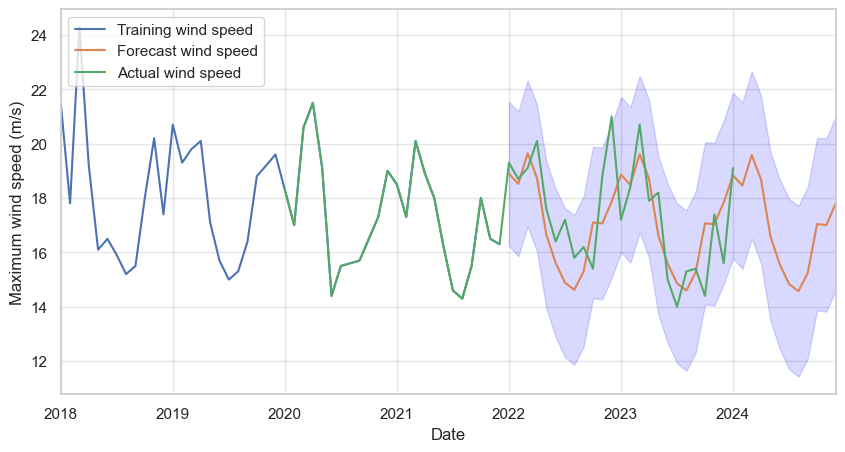

In [97]:
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=36)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast with training data
ax = df_train[-12*4:].plot(figsize=(10,5))
forecast_values.plot(ax=ax)
df_test.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training wind speed', 
            'Forecast wind speed', 
            'Actual wind speed'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum wind speed (m/s)')
plt.grid(alpha=0.5)
plt.show()
